### **SimBench – Standardized Power System Benchmark**

#### Summary

| Total Number of Profiles | Profile Types                        | Type of Load                                      | Renewable                    | Environment | Economy | Voltage Level | Processed | Synthetic | Horizon   | Time Resolution | Location | Geographical |
|--------------------------|--------------------------------------|--------------------------------------------------|-------------------------------|-------------|---------|----------------|-----------|-----------|-----------|------------------|----------|--------------|
| 614                      | load, renewable, powerplant, storage | active, reactive, residential, industry, commercial | solar, wind, biomass, hydro | None        | None    | mixed          | True      | True      | 2016–2017 | 15min            | Germany  | nodal        |


---

#### Data Components:
The SimBench dataset includes four main time series profiles, each stored as a CSV file. These represent various actors in the power system and their corresponding roles.
> **Note:** There is no missing data.

| Profile             | Description                                            | Type         | Role     |
|---------------------|--------------------------------------------------------|--------------|----------|
| `LoadProfile`       (192 profiles)   | Consumer energy demand (Active, Reactive, Residential, Industry, Commercial)| Time series  | Consumer |
| `RESProfile`        (42 profiles)    | Renewable generation (Solar, Wind, Biomass, Hydro)     | Time series  | Producer |
| `PowerPlantProfile` (320 profiles)   | Powerplant generator output (e.g., powerplants)        | Time series  | Producer |
| `StorageProfile`    (60 profiles)    | Storage system charge/discharge behavior               | Time series  | Storage  |

---

#### File Locations:

| Profile             | Raw Folder Location                                         | Processed Folder Location                                        |
|---------------------|-----------------------------------------------------------|--------------------------------------------------------------------|
| `LoadProfile`       | [Consumer](./raw/consumer/)                               | [Consumer](./processed/consumer/)                     |
| `RESProfile`        | [Producer](./raw/producer/)                               | [Producer](./processed/producer/)                     |
| `PowerPlantProfile` | [Producer](./raw/producer/)                               | [Producer](./processed/producer/)                     |
| `StorageProfile`    | [Storage](./raw/1-complete_data-mixed-all-2-sw/producer/) |                      |

---

#### Profile Volume:  
- **Time Resolution:** 15 minutes  
- **Points per Day:** 96 (15-minute intervals × 24 hours)  
- **Total Length:** 35,136  
- **Total Duration Covered:** 366 days (1 full leap year)  
- **Scenarios:** 3 (same profiles reused in all)
> **Note:** All scenarios share the **same** time series profiles for **load and generation**.  
> The variation between scenarios lies in the network topology or component configurations, not in the profile data itself.
 

---

#### Description:  
SimBench is an open dataset of standardized electrical power system benchmark models from low (LV) to extra-high (EHV) voltage grids. It includes synchronized grid topology and full-year time series profiles for consumer demand, renewable and conventional generation, and energy storage systems. Designed for direct compatibility with the `pandapower` Python library.

> **Note**: All time series profiles in SimBench are **synthetic**, not based on real-world measurements.  
> *“For DERs, synthetic time series are provided in the SimBench dataset.”*  
> — [SimBench Paper, MDPI Energies (2020)](https://www.mdpi.com/1996-1073/13/12/3290)

> **Units:**  
> - **Active power** (load/generation): **MW**  
> - **Reactive power**: **MVAr**  
> - **Voltage**: **kV**  
> - **Storage power capacity**: **MW**  
> - **Storage energy capacity**: **MWh**
---

#### Related Links:  
  - [GitHub Repository](https://github.com/e2nIEE/simbench)
  - [SimBench Paper (MDPI Energies, 2020)](https://www.mdpi.com/1996-1073/13/12/3290)
  - [SimBench Documentation](https://simbench.readthedocs.io/en/stable/)


In [1]:
import pandas as pd

# Load CSVs using updated structure
load_profile = pd.read_csv("raw/consumer/LoadProfile.csv", sep=";")
res_profile = pd.read_csv("raw/producer/RESProfile.csv", sep=";")
powerplant_profile = pd.read_csv("raw/producer/PowerPlantProfile.csv", sep=";")
st_profile = pd.read_csv("raw/1-complete_data-mixed-all-2-sw/StorageProfile.csv", sep=";")

In [2]:
# Preview of LoadProfile
load_profile.head(100)

,time,BL-H_qload,BL-H_pload,G0-A_qload,G0-A_pload,G0-M_qload,G0-M_pload,G1-A_qload,G1-A_pload,G1-B_qload,...,HS25_pload,HS25_qload,HS26_pload,HS26_qload,HS27_pload,HS27_qload,HSexp0_pload,HSexp0_qload,HSexp1_pload,HSexp1_qload
0,01.01.2016 00:00,0.143050,0.088339,0.282542,0.143882,0.256264,0.275641,0.056108,0.039528,0.000000,...,0.652520,0.214473,0.653424,0.214770,0.446373,0.146716,0.806813,0.265187,0.966765,0.317760
1,01.01.2016 00:15,0.169872,0.084806,0.389736,0.203032,0.473602,0.283333,0.007014,0.026333,0.021812,...,0.653845,0.214909,0.651595,0.214169,0.441562,0.145134,0.806813,0.265187,0.962273,0.316284
2,01.01.2016 00:30,0.169872,0.077739,0.402408,0.213184,0.376287,0.248718,0.008837,0.027719,0.021812,...,0.655171,0.215344,0.649767,0.213568,0.436751,0.143553,0.806813,0.265187,0.957781,0.314807
3,01.01.2016 00:45,0.151991,0.081272,0.329803,0.170953,0.434676,0.269231,0.012344,0.029826,0.010906,...,0.656496,0.215780,0.647938,0.212967,0.431940,0.141972,0.806813,0.265187,0.953289,0.313331
4,01.01.2016 01:00,0.151991,0.081272,0.385284,0.191256,0.437920,0.271795,0.007014,0.027054,0.000000,...,0.657822,0.216216,0.646110,0.212366,0.427129,0.140390,0.806813,0.265187,0.948797,0.311855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01.01.2016 23:45,0.160932,0.077739,0.346927,0.186113,0.366555,0.243590,0.008837,0.027719,0.021812,...,0.661897,0.217555,0.651232,0.214049,0.789498,0.259495,0.951703,0.312810,0.964086,0.316880
96,02.01.2016 00:00,0.151991,0.077739,0.445217,0.225095,0.473602,0.280769,0.008837,0.028440,0.010906,...,0.676090,0.222220,0.665883,0.218865,0.732912,0.240896,0.806813,0.265187,0.976465,0.320949
97,02.01.2016 00:15,0.160932,0.077739,0.351036,0.181104,0.467114,0.274359,0.003507,0.026333,0.000000,...,0.674383,0.221659,0.661607,0.217460,0.729615,0.239813,0.806813,0.265187,0.976086,0.320824
98,02.01.2016 00:30,0.160932,0.081272,0.402408,0.209800,0.421700,0.258974,0.005330,0.027054,0.010906,...,0.672677,0.221098,0.657332,0.216055,0.726319,0.238729,0.806813,0.265187,0.975706,0.320699


In [3]:
# Preview of RESProfile
res_profile.head(100)

,time,PV1,PV2,PV3,PV4,PV5,PV6,PV7,PV8,WP1,...,lv_semiurb5,lv_urban6,mv_rural,mv_semiurb,mv_urban,mv_comm,mv_add1,mv_add2,hv_mixed,hv_urban
0,01.01.2016 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.468377,0.426260,0.196906,0.422816,0.334962,0.311727,0.840737,0.621764
1,01.01.2016 00:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.470134,0.425880,0.194635,0.421108,0.307643,0.297369,0.839509,0.617905
2,01.01.2016 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.470606,0.425512,0.195878,0.419412,0.312232,0.295831,0.838196,0.614149
3,01.01.2016 00:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.470889,0.425116,0.194635,0.417687,0.308535,0.329292,0.836783,0.610829
4,01.01.2016 01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.471316,0.424748,0.194635,0.415991,0.295777,0.331466,0.835428,0.607070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01.01.2016 23:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814888,...,0.0,0.0,0.178339,0.170952,0.199609,0.406502,0.166326,0.239413,0.280386,0.476988
96,02.01.2016 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.843329,...,0.0,0.0,0.177782,0.171433,0.198988,0.402432,0.183274,0.241292,0.282023,0.469606
97,02.01.2016 00:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861074,...,0.0,0.0,0.179387,0.170950,0.198988,0.397264,0.141780,0.233566,0.280325,0.464062
98,02.01.2016 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.878819,...,0.0,0.0,0.181069,0.170481,0.198988,0.392112,0.188117,0.245830,0.278639,0.458879


In [4]:
# Preview of PowerPlantProfile
powerplant_profile.head(100)

,time,imp0,imp1,pp_1,pp_10,pp_100,pp_101,pp_102,pp_103,pp_104,...,pp_90,pp_91,pp_92,pp_93,pp_94,pp_95,pp_96,pp_97,pp_98,pp_99
0,01.01.2016 00:00,0.806813,0.966765,0.7,0.7,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01.01.2016 00:15,0.806813,0.962273,0.7,0.7,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01.01.2016 00:30,0.806813,0.957781,0.7,0.7,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01.01.2016 00:45,0.806813,0.953289,0.7,0.7,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01.01.2016 01:00,0.806813,0.948797,0.7,0.7,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01.01.2016 23:45,0.951703,0.964086,0.7,0.7,0.700000,0.7,0.700000,0.7,0.700000,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
96,02.01.2016 00:00,0.806813,0.976465,0.7,0.7,0.700000,0.7,0.700000,0.7,0.161290,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
97,02.01.2016 00:15,0.806813,0.976086,0.7,0.7,0.700000,0.7,0.700000,0.7,0.572833,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
98,02.01.2016 00:30,0.806813,0.975706,0.7,0.7,0.700000,0.7,0.406504,0.0,0.000000,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7


In [5]:
# Length of each data profile in a table
profiles = {
    "LoadProfile": load_profile,
    "RESProfile": res_profile,
    "PowerPlantProfile": powerplant_profile
}

lengths = {name: len(df) for name, df in profiles.items()}
length_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])
print(length_df)

                   Length
LoadProfile         35136
RESProfile          35136
PowerPlantProfile   35136


In [6]:
# Check if there is any missing data
for name, df in profiles.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in LoadProfile:
time            0
BL-H_qload      0
BL-H_pload      0
G0-A_qload      0
G0-A_pload      0
               ..
HS27_qload      0
HSexp0_pload    0
HSexp0_qload    0
HSexp1_pload    0
HSexp1_qload    0
Length: 193, dtype: int64

Missing values in RESProfile:
time           0
PV1            0
PV2            0
PV3            0
PV4            0
PV5            0
PV6            0
PV7            0
PV8            0
WP1            0
WP2            0
WP3            0
WP4            0
WP5            0
WP6            0
WP7            0
WP8            0
WP9            0
WP10           0
WP11           0
WP12           0
BM1            0
BM2            0
BM3            0
BM4            0
BM5            0
Hydro1         0
Hydro2         0
Hydro3         0
lv_rural1      0
lv_rural2      0
lv_rural3      0
lv_semiurb4    0
lv_semiurb5    0
lv_urban6      0
mv_rural       0
mv_semiurb     0
mv_urban       0
mv_comm        0
mv_add1        0
mv_add2        0
hv_mixed       0

In [7]:
# Convert time column to datetime for all profiles
for df in [load_profile, res_profile, powerplant_profile]:
    df['time'] = pd.to_datetime(df['time'], dayfirst=True)

In [8]:
# Check if there are any missing time stamps
for name, df in profiles.items():
    expected_times = pd.date_range(start=df['time'].min(), end=df['time'].max(), freq='15min')
    actual_times = df['time']
    missing_times = expected_times.difference(actual_times)

    print(f"\n{name} missing timestamps: {len(missing_times)}")
    if not missing_times.empty:
        print(missing_times)

# 1 Missing time stamp from daylight saving time



LoadProfile missing timestamps: 4
DatetimeIndex(['2016-03-27 02:00:00', '2016-03-27 02:15:00',
               '2016-03-27 02:30:00', '2016-03-27 02:45:00'],
              dtype='datetime64[ns]', freq='15min')

RESProfile missing timestamps: 4
DatetimeIndex(['2016-03-27 02:00:00', '2016-03-27 02:15:00',
               '2016-03-27 02:30:00', '2016-03-27 02:45:00'],
              dtype='datetime64[ns]', freq='15min')

PowerPlantProfile missing timestamps: 4
DatetimeIndex(['2016-03-27 02:00:00', '2016-03-27 02:15:00',
               '2016-03-27 02:30:00', '2016-03-27 02:45:00'],
              dtype='datetime64[ns]', freq='15min')


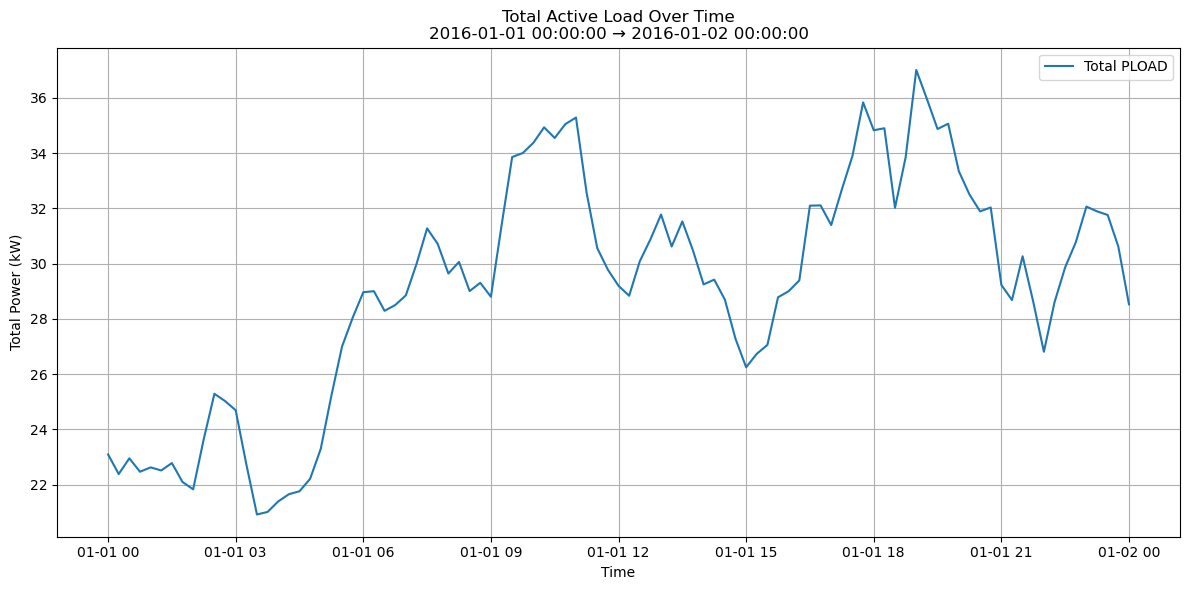

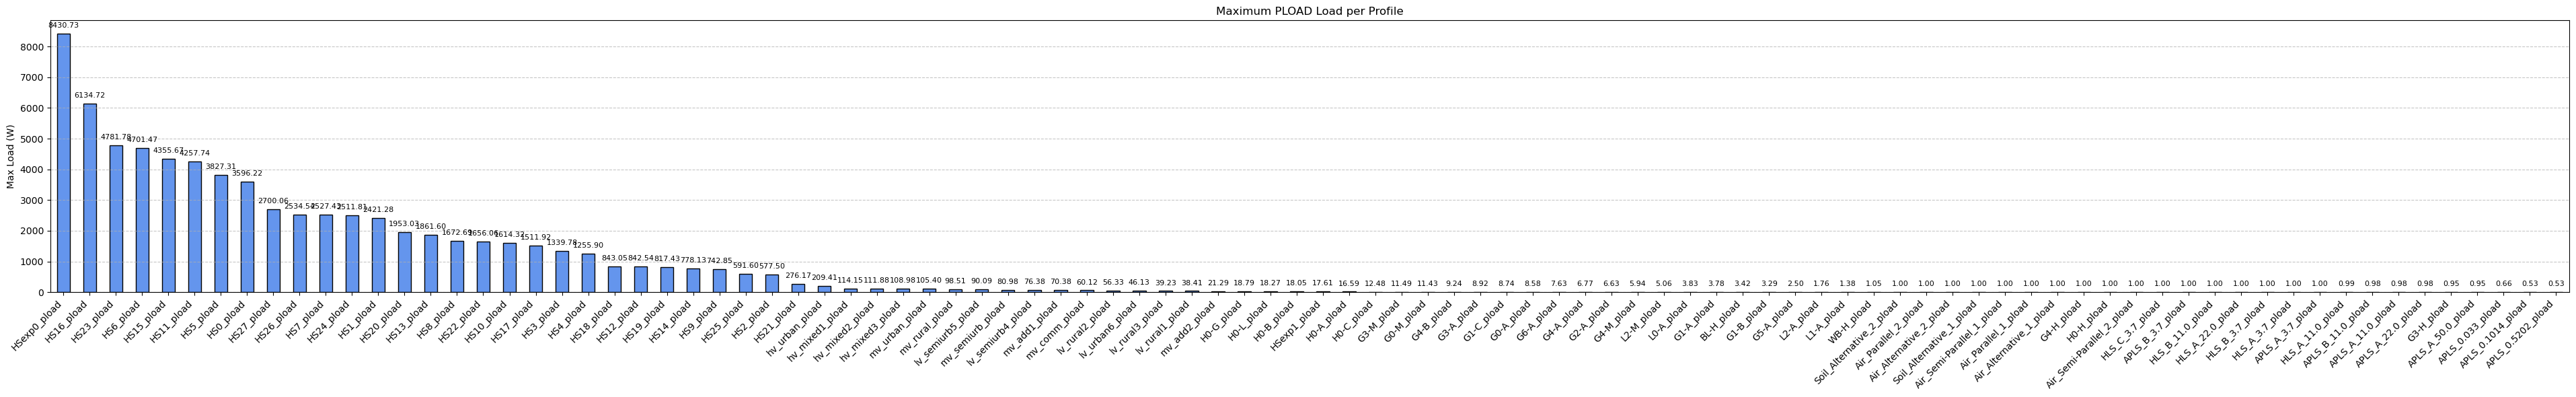

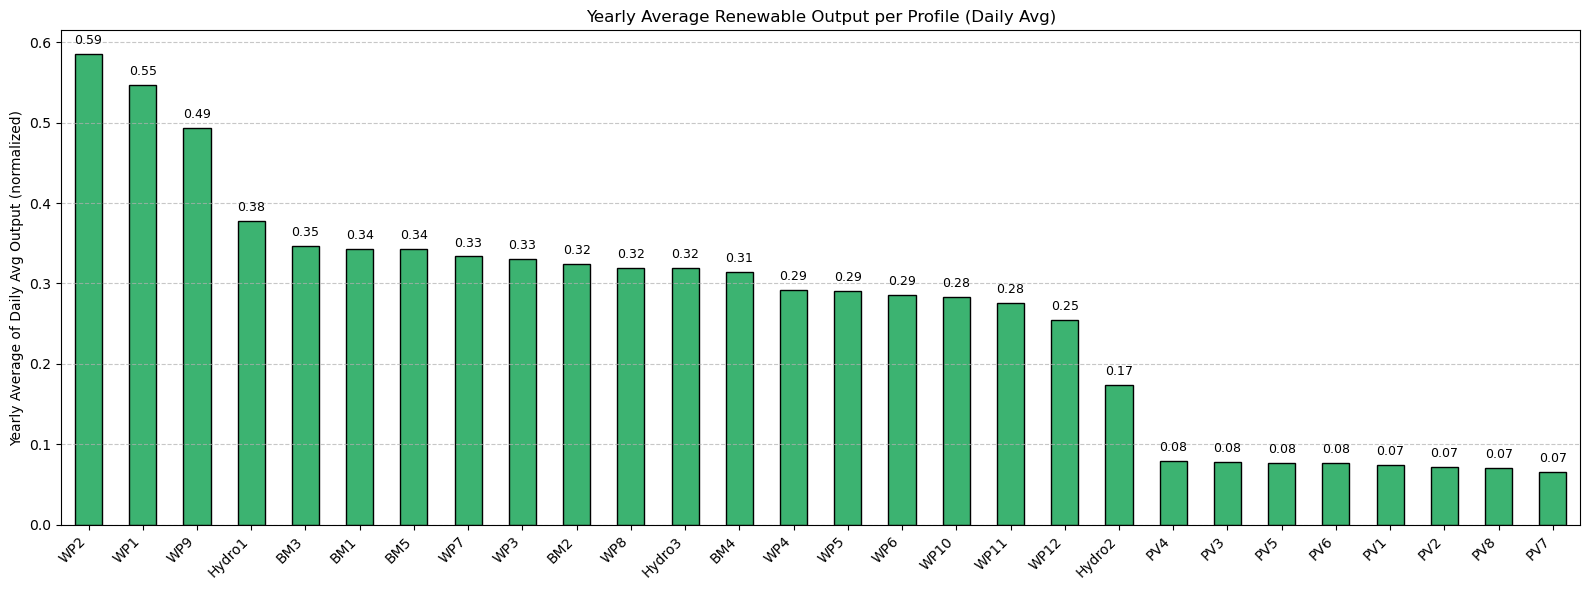

In [9]:
import sys
sys.path.append("..")

from utils.simbench_plotter import (
    plot_simbench_total_load_over_time,
    unnormalize_simbench_loadprofile,
    plot_simbench_profile_max_loads_as_bar,
    plot_simbench_res_daily_avg_as_bar
)

fp_load = "raw/consumer/LoadProfile.csv"
fp_res  = "raw/producer/RESProfile.csv"

# Active/Reactive load over time period, downsampled to 300 points (i.e. the result could vary slightly)
plot_simbench_total_load_over_time(
    fp=fp_load,
    kind="pload",  # or "qload" for reactive
    start_time="2016-01-01 00:00:00",
    end_time="2016-01-02 00:00:00",
    max_points=300
)

# Step 4: Plot each load profile over the full dataset period
unnormalize_simbench_loadprofile(
    fp_profile="raw/consumer/LoadProfile.csv",
    fp_capacity="raw/consumer/Load.csv",
    output_fp="processed/consumer/LoadProfile_scaled.csv",
    plot=True  # optional, will call bar chart directly
)

# Step 5: Plot yearly average of daily average RES production over the full dataset period
plot_simbench_res_daily_avg_as_bar(fp_res)

#### Calculate the number of profiles in each profile category

In [10]:
# Helper function to count profiles (excluding the time column)
def count_profiles(df, label):
    num_profiles = len(df.columns) - 1
    print(f"{label} contains {num_profiles} profiles")

# Print counts
count_profiles(load_profile, "Load profile")
count_profiles(res_profile, "Renewable profile")
count_profiles(powerplant_profile, "Power plant profile")
count_profiles(st_profile, "Storage profile")


Load profile contains 192 profiles
Renewable profile contains 42 profiles
Power plant profile contains 320 profiles
Storage profile contains 60 profiles
